In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Safety,yacEPA,Drive,FieldGoalDistance,airEPA,Field_Goal_Prob,posteam,Penalty.Yards,FieldGoalResult,...,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,RunGap,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
0,244485,0,1.240299,18,NaN,-0.588101,0.309404,TB,0,NaN,...,0,3,3,NaN,1,1,2014,0.000527,0.024134,0
1,115340,0,NaN,22,NaN,NaN,0.198142,OAK,0,NaN,...,0,4,3,NaN,0,7,2011,0.001883,0.246929,0
2,68357,0,NaN,8,NaN,NaN,0.000000,NYJ,0,NaN,...,0,2,1,NaN,0,1,2010,0.000000,0.000000,0
3,368377,0,1.075660,24,NaN,0.402080,0.258227,CLE,0,NaN,...,0,4,0,NaN,1,9,2017,0.000845,0.133814,0
4,384684,0,NaN,11,NaN,NaN,0.199771,DEN,0,NaN,...,0,2,2,end,0,10,2017,0.003453,0.170787,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40769 entries, 0 to 40768
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   40769 non-null  int64  
 1   Safety                       40769 non-null  int64  
 2   yacEPA                       15867 non-null  float64
 3   Drive                        40769 non-null  int64  
 4   FieldGoalDistance            902 non-null    float64
 5   airEPA                       15875 non-null  float64
 6   Field_Goal_Prob              40748 non-null  float64
 7   posteam                      38219 non-null  object 
 8   Penalty.Yards                40769 non-null  int64  
 9   FieldGoalResult              908 non-null    object 
 10  DefTeamScore                 38019 non-null  float64
 11  Tackler2                     4943 non-null   object 
 12  Away_WP_pre                  38223 non-null  float64
 13  Timeout_Indicato

# nullar eng ko'p bolgan ustunlarni ochirib tashlash

In [4]:

dct = (df.isnull().sum() > 39500).to_dict()

for key, value in dct.items():
    if value is True:
        df = df.drop(columns=key)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40769 entries, 0 to 40768
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   40769 non-null  int64  
 1   Safety                       40769 non-null  int64  
 2   yacEPA                       15867 non-null  float64
 3   Drive                        40769 non-null  int64  
 4   airEPA                       15875 non-null  float64
 5   Field_Goal_Prob              40748 non-null  float64
 6   posteam                      38219 non-null  object 
 7   Penalty.Yards                40769 non-null  int64  
 8   DefTeamScore                 38019 non-null  float64
 9   Tackler2                     4943 non-null   object 
 10  Away_WP_pre                  38223 non-null  float64
 11  Timeout_Indicator            40769 non-null  int64  
 12  ydsnet                       40769 non-null  int64  
 13  TimeSecs        

In [5]:
print(df['Field_Goal_Prob'].mean())
print(df['Field_Goal_Prob'].median())
print(df['Field_Goal_Prob'].mode())

0.24367961032922636
0.2306319714387671
0    0.0
Name: Field_Goal_Prob, dtype: float64


<Axes: xlabel='Field_Goal_Prob_not_null', ylabel='Count'>

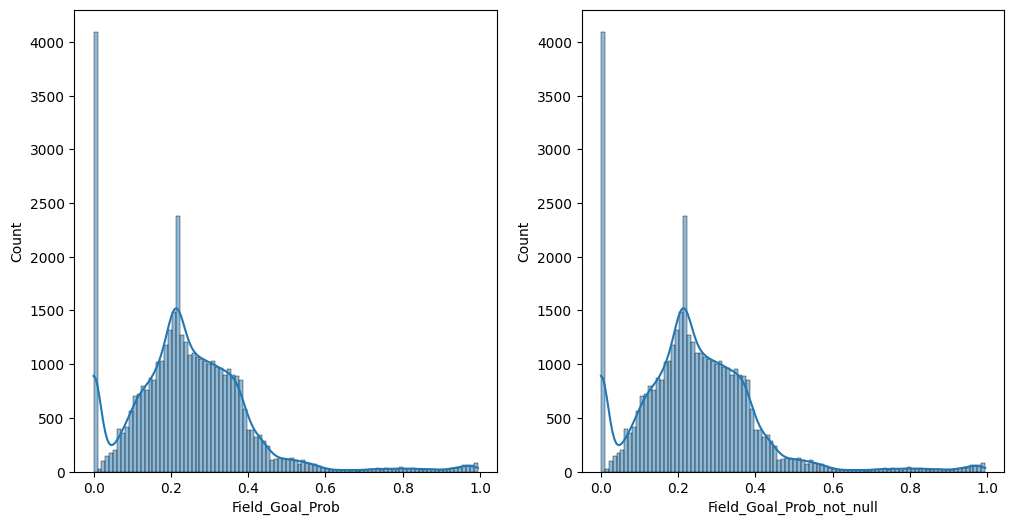

In [6]:
df['Field_Goal_Prob_not_null'] = df['Field_Goal_Prob'].fillna(df['Field_Goal_Prob'].mean())

fig, (ax0, ax1) = plt.subplots(1,2)
fig.set_size_inches(12,6)
sns.histplot(df['Field_Goal_Prob'], kde=True, ax=ax0)
sns.histplot(df['Field_Goal_Prob_not_null'], kde=True, ax=ax1)

In [7]:
print(df['DefTeamScore'].mean())
print(df['DefTeamScore'].median())

11.366316841579211
10.0


<Axes: xlabel='DefTeamScore_not_null', ylabel='Count'>

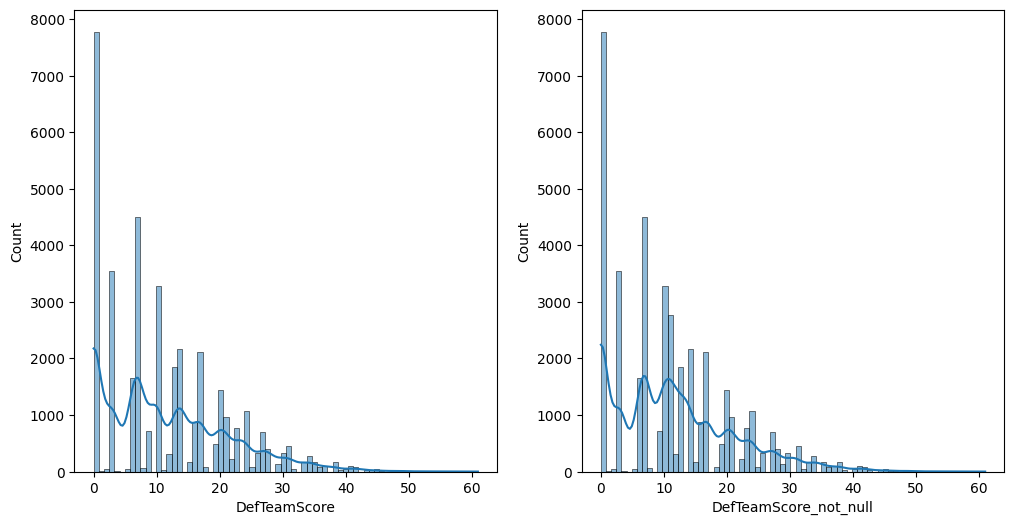

In [8]:
df['DefTeamScore_not_null'] = df['DefTeamScore'].fillna(df['DefTeamScore'].mean())

fig, (ax0, ax1) = plt.subplots(1,2)
fig.set_size_inches(12,6)
sns.histplot(df['DefTeamScore'], kde=True, ax=ax0)
sns.histplot(df['DefTeamScore_not_null'], kde=True, ax=ax1)

In [9]:
df['posteam'].mode()

0    DEN
Name: posteam, dtype: object

In [10]:
df['posteam_not_null'] = df['posteam'].fillna('DEN')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40769 entries, 0 to 40768
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   40769 non-null  int64  
 1   Safety                       40769 non-null  int64  
 2   yacEPA                       15867 non-null  float64
 3   Drive                        40769 non-null  int64  
 4   airEPA                       15875 non-null  float64
 5   Field_Goal_Prob              40748 non-null  float64
 6   posteam                      38219 non-null  object 
 7   Penalty.Yards                40769 non-null  int64  
 8   DefTeamScore                 38019 non-null  float64
 9   Tackler2                     4943 non-null   object 
 10  Away_WP_pre                  38223 non-null  float64
 11  Timeout_Indicator            40769 non-null  int64  
 12  ydsnet                       40769 non-null  int64  
 13  TimeSecs        

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'TB'),
  Text(1, 0, 'OAK'),
  Text(2, 0, 'NYJ'),
  Text(3, 0, 'CLE'),
  Text(4, 0, 'DEN'),
  Text(5, 0, 'SEA'),
  Text(6, 0, 'LAC'),
  Text(7, 0, 'DAL'),
  Text(8, 0, 'NO'),
  Text(9, 0, 'NE'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'WAS'),
  Text(12, 0, 'JAX'),
  Text(13, 0, 'STL'),
  Text(14, 0, 'MIA'),
  Text(15, 0, 'CAR'),
  Text(16, 0, 'ARI'),
  Text(17, 0, 'SD'),
  Text(18, 0, 'MIN'),
  Text(19, 0, 'CIN'),
  Text(20, 0, 'KC'),
  Text(21, 0, 'CHI'),
  Text(22, 0, 'SF'),
  Text(23, 0, 'PHI'),
  Text(24, 0, 'BAL'),
  Text(25, 0, 'ATL'),
  Text(26, 0, 'TEN'),
  Text(27, 0, 'BUF'),
  Text(28, 0, 'PIT'),
  Text(29, 0, 'NYG'),
  Text(30, 0, 'HOU'),
  Text(31, 0, 'DET'),
  Text(32, 0, 'IND'),
  Text(33, 0, 'JAC'),
  Text(34, 0, 'LA')])

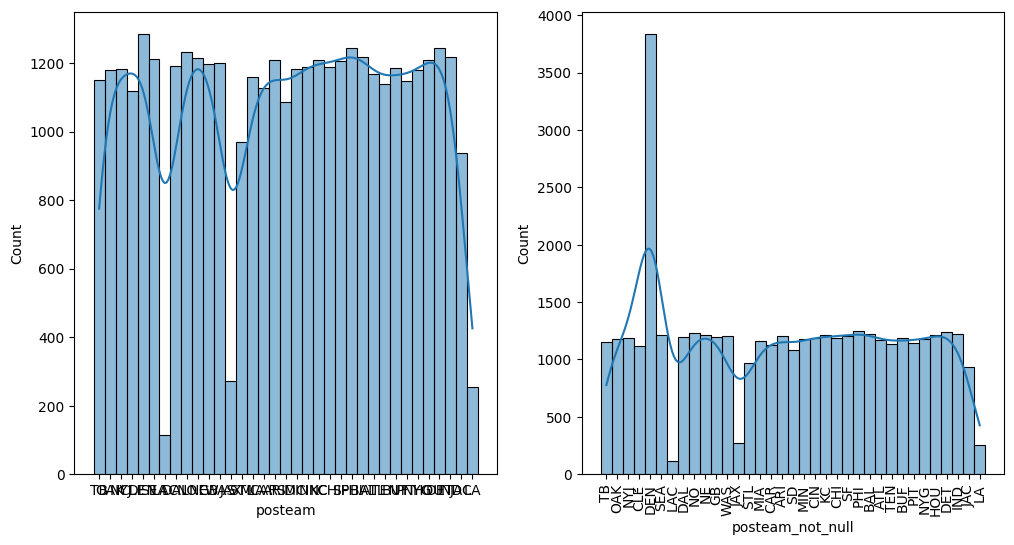

In [11]:

fig, (ax0, ax1) = plt.subplots(1,2)
fig.set_size_inches(12,6)
sns.histplot(df['posteam'], kde=True, ax=ax0)
sns.histplot(df['posteam_not_null'], kde=True, ax=ax1)
plt.xticks(rotation=90)